<a href="https://colab.research.google.com/github/shureemshokri/NeuralCompAssignment2/blob/main/07b_Assignment_2_Nueral_Comp_Shureem_Shokri.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Define custom transform to add Gaussian noise
class AddGaussianNoise(object):
    def __init__(self, std):
        self.std = std

    def __call__(self, tensor):
        return tensor + torch.randn_like(tensor) * self.std

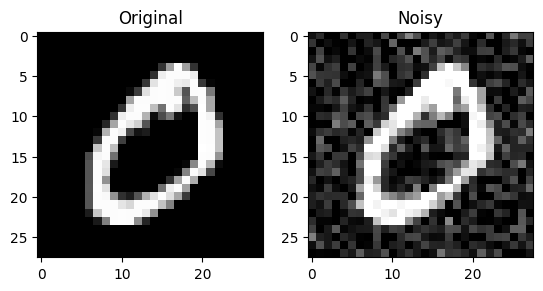

In [ ]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt



transformCustom = transforms.Compose([
                                transforms.ToTensor(), #this convert to tensor
                                transforms.Lambda(lambda x:x.view(-1))  #this flatten 28*28 into a 784 vector for each image
])


original_dataset = datasets.MNIST(root='./data', train=True,transform=transformCustom ,download=True)
noisy_dataset = datasets.MNIST(root='./data', train=True,transform=transformCustom ,download=True)

mean = 30
std = 40  # You can adjust this value to control the amount of noise

noisy_dataset = np.array(noisy_dataset.data)
noise = np.random.normal(mean, std, size=noisy_dataset.shape)
noisy_dataset = np.clip(noisy_dataset + noise, 0, 255)
noisy_dataset = noisy_dataset.astype(np.uint8)

image_noisy = noisy_dataset[1]
image = original_dataset.data[1]



# # Set the standard deviation for the Gaussian noise
# std_dev = 0.2

# # Define the transforms for the MNIST dataset
# transform = transforms.Compose([
#     transforms.ToTensor(),
#     AddGaussianNoise(std=std_dev)
# ])

# # Load the MNIST dataset with the specified transform
# ori_image = datasets.MNIST(root="./data", train=True, download=True, transform=transforms.ToTensor())
# noisy_image = datasets.MNIST(root="./data", train=True, download=True, transform=transform)

# # Visualize an example image with and without noise
# index = 1  # Index of the image to visualize


# ori_img = ori_image[index][0]
# noisy = noisy_image[index][0]


plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original')

plt.subplot(1, 2, 2)
plt.imshow(image_noisy, cmap='gray')
plt.title('Noisy')

plt.show()

#Defining compute probability function

In [ ]:
import numpy as np

def compute_probability(image):

  # Count the occurrences of each pixel value in the image
    counts = np.bincount(image.flatten(), minlength=256)

    # Normalize the counts to obtain probabilities
    total_pixels = np.prod(image.shape)
    probabilities = counts / total_pixels

    return probabilities

In [ ]:
def plot_probability_distribution(probability_dist, title):
    # Create x-axis values (pixel values)
    x = range(len(probability_dist))

    # Create y-axis values (probabilities)
    y = probability_dist

    # Set the width of the bars
    bar_width = 1.5

    plt.figure(figsize=(10, 5))

    # Plot the probability distribution
    plt.bar(x, y,width=bar_width)
    plt.title(title)
    plt.show()


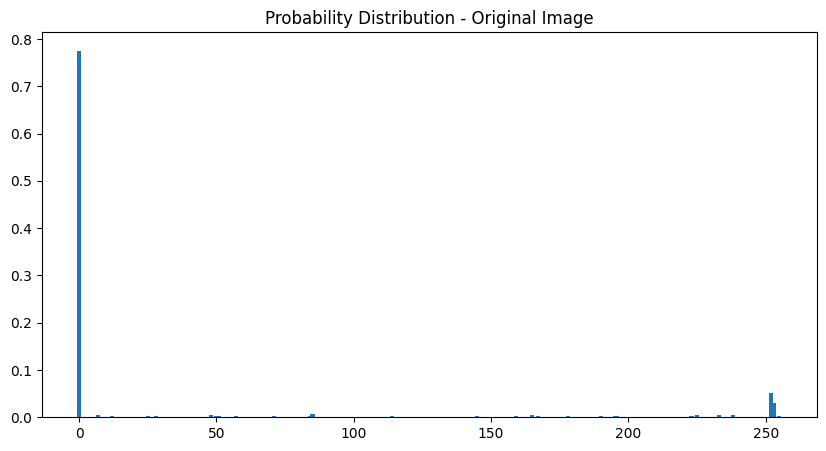

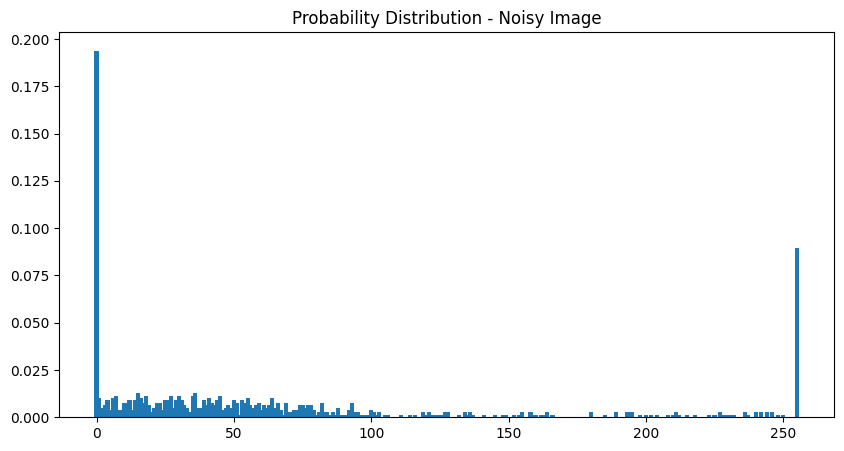

In [ ]:
# Compute probability distributions for the original and noisy images
probability_ori = compute_probability(image)
# probability_dist_noisy = compute_probability(image0_noisy)

probability_noisy = compute_probability(image_noisy)

# Plot the probability distribution for the original image
plot_probability_distribution(probability_ori, 'Probability Distribution - Original Image')

# Plot the probability distribution for the noisy image
plot_probability_distribution(probability_noisy, 'Probability Distribution - Noisy Image')

# COmputing Cross Entropy Value

<ipython-input-77-545071f2353f>:1: RuntimeWarning: divide by zero encountered in log
  formula = np.where(probability_noisy!=0, probability_ori * np.log(probability_noisy),0)
<ipython-input-77-545071f2353f>:1: RuntimeWarning: invalid value encountered in multiply
  formula = np.where(probability_noisy!=0, probability_ori * np.log(probability_noisy),0)


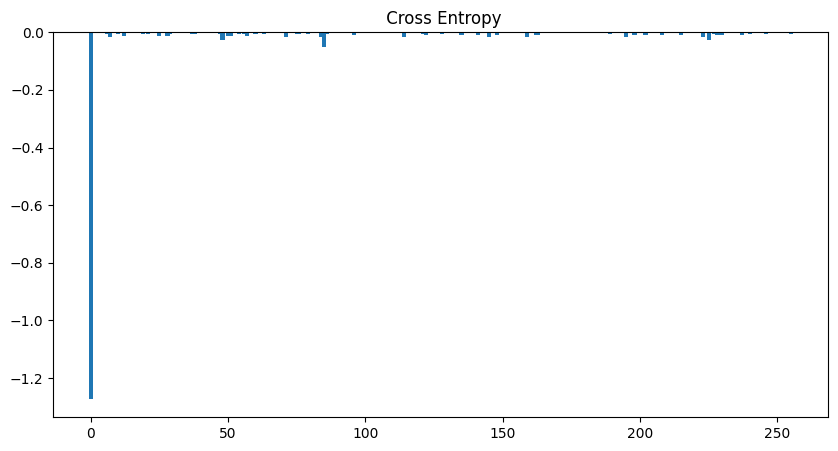

In [ ]:
formula = np.where(probability_noisy!=0, probability_ori * np.log(probability_noisy),0)
plot_probability_distribution(formula," Cross Entropy")

In [ ]:
#calculating total cross entropy
total = np.sum(formula)
total = -1 * total

print(f"the total cross entropy is : {total}")


the total cross entropy is : 1.8657419045850012
